In [1]:
from evaluation.eval_utils import *

import numpy as np
from datetime import timedelta
import dateutil
import pandas as pd

import os
from tqdm.notebook import trange

%load_ext autoreload
%autoreload 2

In [2]:
def dataframe_from_csv(target):
    return pd.read_csv(target, sep=',').rename(columns=lambda x: x.strip())

def dataframe_from_csvs(targets):
    return pd.concat([dataframe_from_csv(x) for x in targets])

In [3]:
def time_check(df: pd.DataFrame, time_col_name: str, window_size: int) -> list:
    timestamp = df[time_col_name].values
    
    non_cont_id = []
    for L in range(len(timestamp) - window_size + 1):
        R = L + window_size - 1                                    
        if dateutil.parser.parse(timestamp[R]) - dateutil.parser.parse(timestamp[L]) != timedelta(seconds=(window_size-1)):
            # print(timestamp[L], timestamp[R])            
            non_cont_id.append(L)

    return non_cont_id

## N41 on SWaT

In [4]:
N_GROUP = 45
WINDOW_SIZE = 60
RESULT_DIR = './result_swat'
FPR = 1e-3

In [5]:
# Load swat labels

TEST_DF_RAW = dataframe_from_csvs(['~/NAS/Data/SWaT_myver/SWaT_Dataset_Attack_v31.csv'])
invalid_test_ids = time_check(TEST_DF_RAW, 'timestamp', WINDOW_SIZE)
print(f"#invalid ids: {len(invalid_test_ids)}")

label_att = TEST_DF_RAW['label'].values
label_att = np.delete(label_att, invalid_test_ids, axis=0)
label_att = label_att[WINDOW_SIZE-1:]

swat_label = np.zeros(len(label_att))
swat_label[label_att == 'Attack'] = 1.0

#invalid ids: 118


In [6]:
# Load anomaly scores

swat_scores = []
for i in range(N_GROUP):
    if os.path.isfile('{}/{}.npy'.format(RESULT_DIR, i)):
        swat_scores.append(np.load('{}/{}.npy'.format(RESULT_DIR, i)))

There are 26 groups in the given results

The maximum number of false alarm instances:  395
There are 26 groups in the given results



  0%|          | 0/395 [00:00<?, ?it/s]

2025-05-27 07:56:14,266	INFO worker.py:1673 -- Started a local Ray instance.


40052.0
Build attack ranges...
Finding the attack range with the minimum false positive count...


  0%|          | 0/395 [00:00<?, ?it/s]

2025-05-27 07:57:28,404	INFO worker.py:1673 -- Started a local Ray instance.


There are 26 groups in the given results



  0%|          | 0/395 [00:00<?, ?it/s]

2025-05-27 07:58:08,412	INFO worker.py:1673 -- Started a local Ray instance.


0.6032636892563508
0.5888193765115189
0.5753083098793186



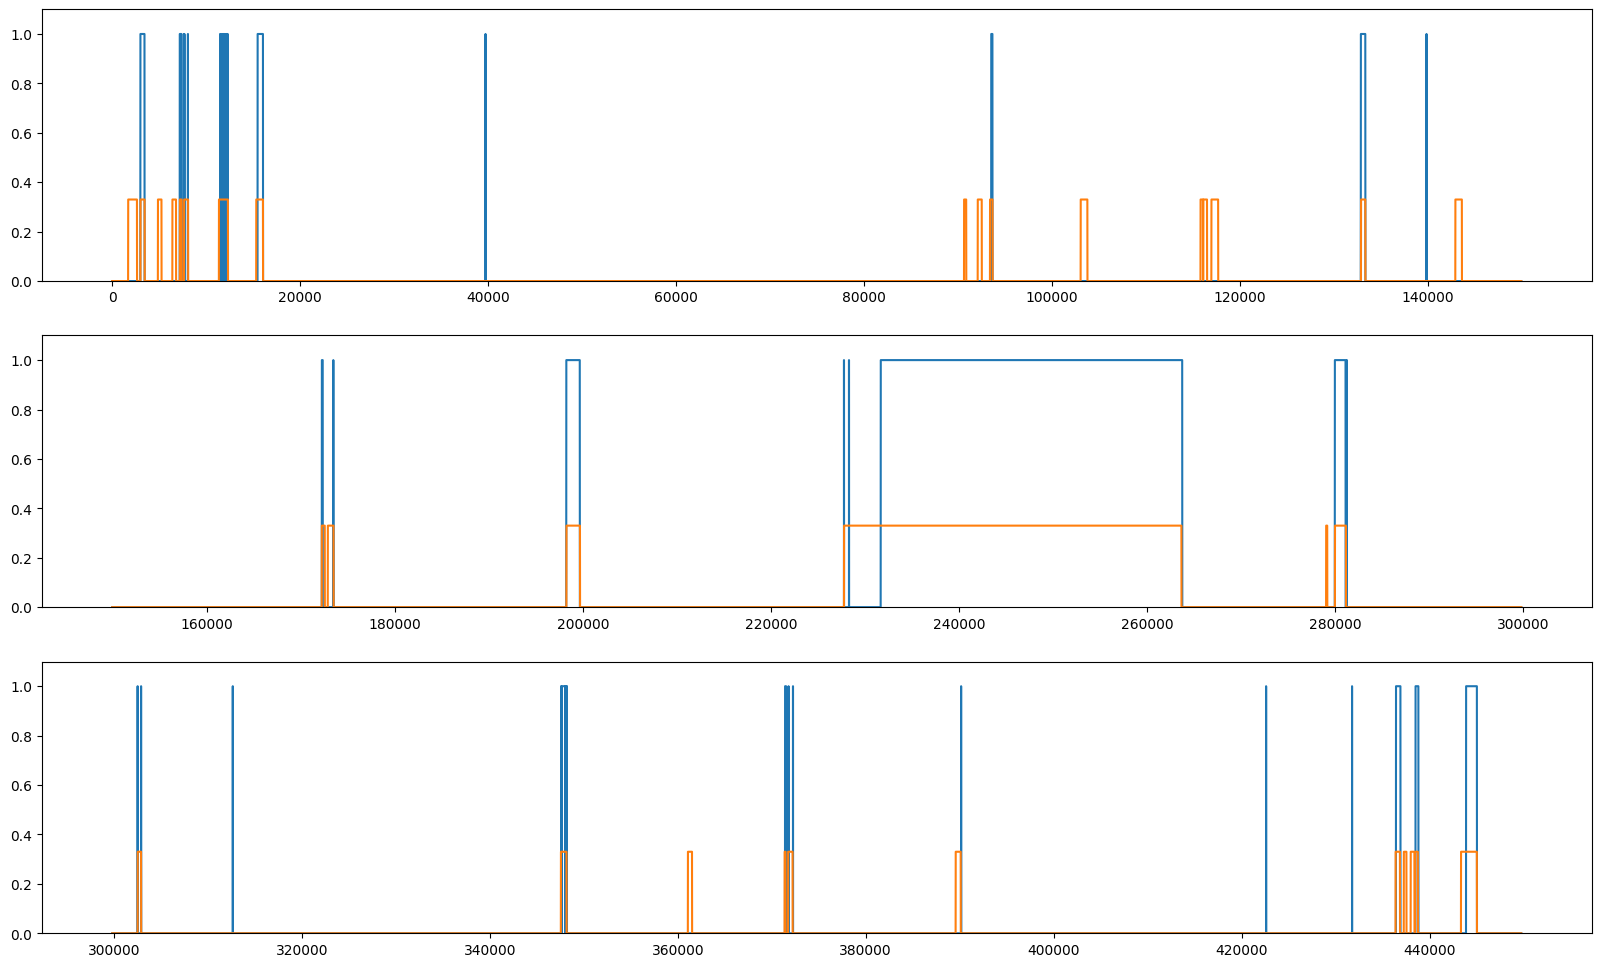

precision: 0.9899663848426199
recall: 0.7212244897959184
f1: 0.8344925296239052

point-adjust precision: 0.9916774043640819
point-adjust recall: 0.8710018552875696
point-adjust f1: 0.927430586422497

eTaP:  0.9373087313139936
eTaR:  0.4447576552395076
eTaF1:  0.6032636892563508
eTaRd:  0.5588235294117647



In [7]:
evaluate_ensemble_best(swat_label, np.array(swat_scores), 1e-3, False)

## N41 on HAI22

In [8]:
N_GROUP = 86
WINDOW_SIZE = 60
RESULT_DIR = './result_hai22'
FPR = 1e-3

In [9]:
# Load hai22.04 labels

att = []
for i in range(1, 5):
    att = np.concatenate((att, pd.read_csv('~/NAS/Data/hai-master/hai-22.04/test{}.csv'.format(i))["Attack"].values[59:]))
hai22_label = np.array(att, dtype=int)

In [10]:
# Load anomaly scores

hai22_scores = []
for i in range(N_GROUP):
    if os.path.isfile(f"{RESULT_DIR}/{i}.npy"):
        hai22_scores.append(np.load(f"{RESULT_DIR}/{i}.npy"))
hai22_scores = np.array(hai22_scores)

There are 46 groups in the given results

The maximum number of false alarm instances:  348
There are 46 groups in the given results



  0%|          | 0/348 [00:00<?, ?it/s]

2025-05-27 08:00:05,897	INFO worker.py:1673 -- Started a local Ray instance.


6293.0
Build attack ranges...
Finding the attack range with the minimum false positive count...


  0%|          | 0/348 [00:00<?, ?it/s]

2025-05-27 08:00:27,208	INFO worker.py:1673 -- Started a local Ray instance.


There are 46 groups in the given results



  0%|          | 0/348 [00:00<?, ?it/s]

2025-05-27 08:01:06,199	INFO worker.py:1673 -- Started a local Ray instance.


0.710448956394174
0.735191965562009
0.7054627507968677



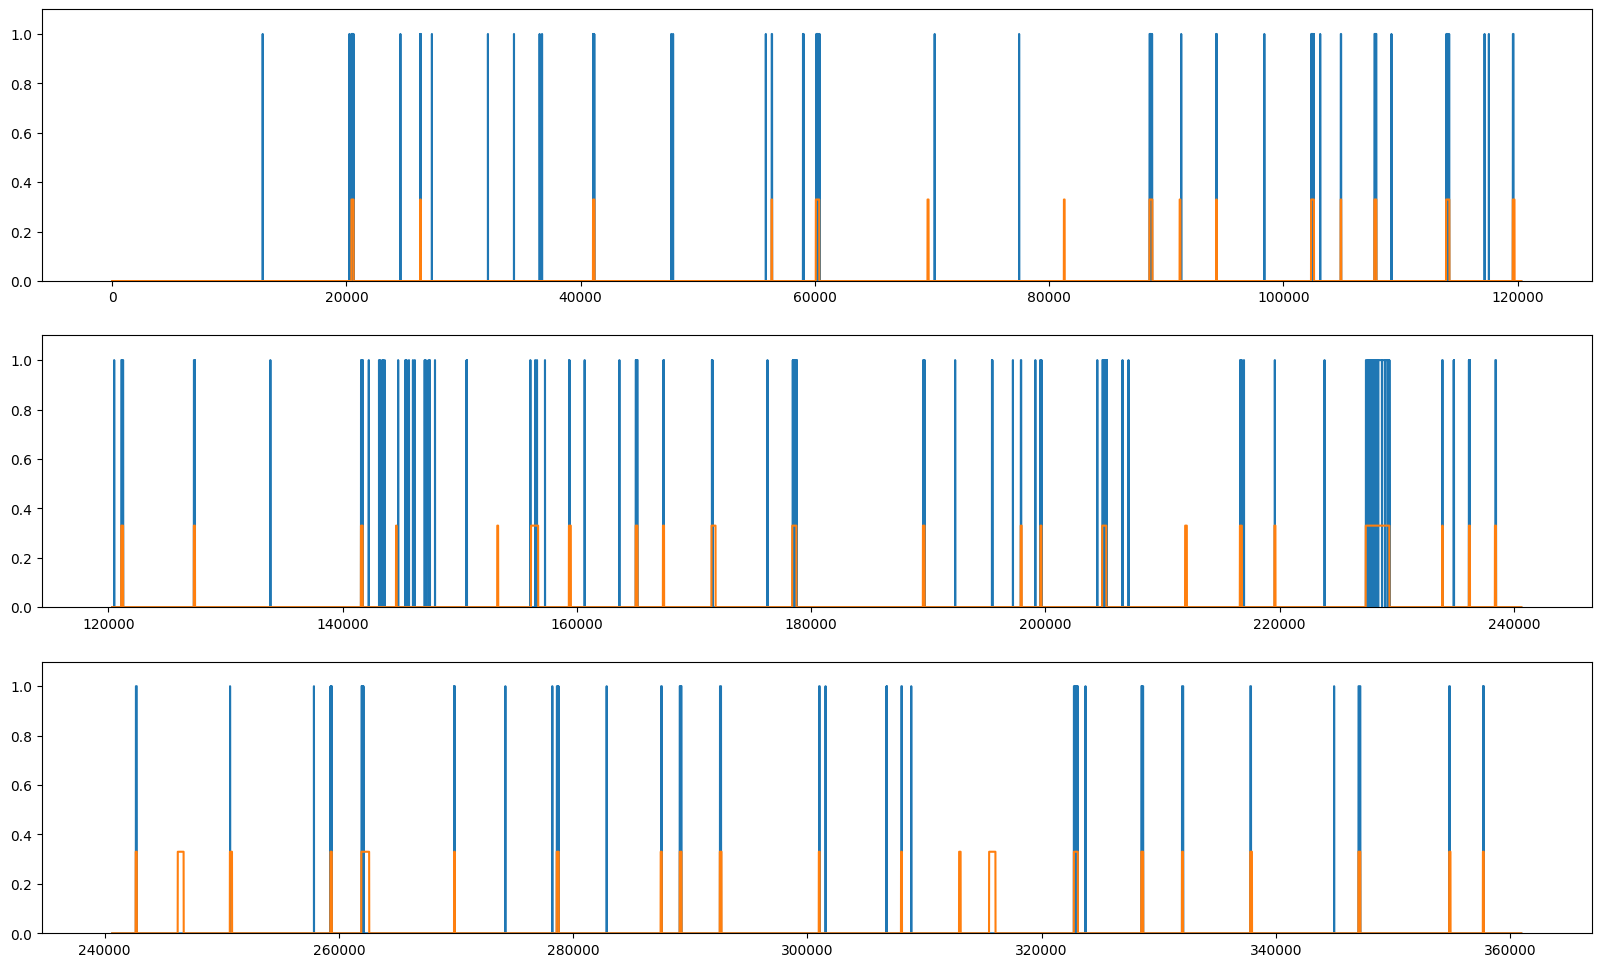

precision: 0.9448593675512474
recall: 0.4942643391521197
f1: 0.6490203569284506

point-adjust precision: 0.9674971899587861
point-adjust recall: 0.8586034912718205
point-adjust f1: 0.9098035761472737

eTaP:  0.8333540722540516
eTaR:  0.6577182793354526
eTaF1:  0.735191965562009
eTaRd:  0.8448275862068966



In [11]:
evaluate_ensemble_best(hai22_label, hai22_scores, FPR)